The nltp library simplfy data cleaning process by outputing the cleaned version of text passed with just one line of code.

To insatll simple pip install nltp on your terminal. You can get more inform in the documentation
from the project github link: https://github.com/izzyx6/nltp

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltp import Preprocessor

The fraud email dataset used here is gotten from kaggle

In [26]:
df = pd.read_csv('fraud_email.csv')
df.head()

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0


In [27]:
df.rename(columns={'Text':'Emails'}, inplace=True)

In [28]:
df.isnull().sum()

Emails    1
Class     0
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
df['Class'].value_counts()

0    6742
1    5186
Name: Class, dtype: int64

In [31]:
df.shape

(11928, 2)

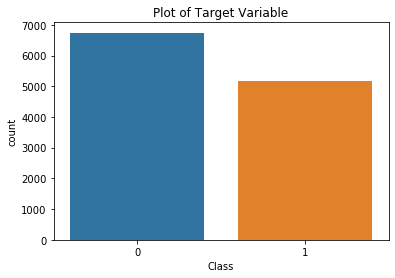

In [32]:
#VISUALIZING OUR TARGET VALUES
sns.countplot(df['Class'])
plt.title("Plot of Target Variable")
plt.show()

Using the nltp library simplfies the text cleaning process, as it cleans the emails passed to it by default(removes bad pattern and stop words, tokenization and lemmatization). We can also get the token form of the text passed to it by using .token().

In [52]:
pre = Preprocessor(df['Emails']).text_cleaner()

Cleaning Complete
Time Taken: 17.955 seconds


In [160]:
pre[2]

'dear friend greeting wish accost request would immense benefit u executor will possible may tempted make fortune client situation cannot help left better option issue presenting case client willed fortune next kin unfortunate next kin died day st october egyptian airline passenger board confirm website published bbc world news website http ew bbc co uk hi world america stm faced confusion pas fortune according english law fortune supposed bequeathed government nobody come forward next kin within seven year demise benefactor purpose contacting seek acting beneficiary lay claim legacy million deceased client bequeathed next kin alone know client great confidence everything left share would would want give huge part share tsunami victim primary objective amend add codicil make beneficiary million legacy feel may apprehensive consider amount big defend matter document back legacy passed next kin sure getting consent issue prefer divulge full identity risk disbarred english bar considers b

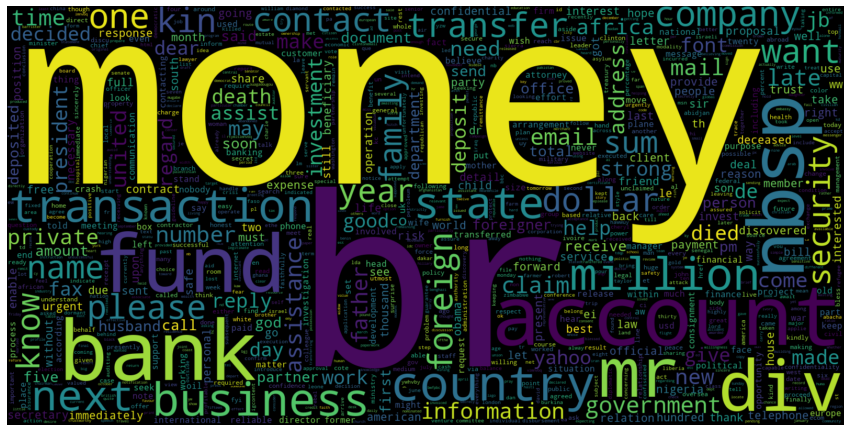

In [54]:
words = pre
plt.figure(figsize = (15,15))
word_cloud  = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(words))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Now we have the cleaned text from nltp, we can select our features and and split our data into training and testing set

In [55]:
X = pre
y = df['Class']

In [144]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(f'Spliting Completed')
print(f'X Train: {len(X_train)} X Test: {len(X_test)} y Train: {len(y_train)} y Test: {len(y_test)}')

Spliting Completed
X Train: 9542 X Test: 2386 y Train: 9542 y Test: 2386


Since different models will be used, it would be proper to modularize our codes by breaking them into functions

In [134]:
#creating a function that can be used to train and test our models
def fit_predict(model):   
    #CREATING A PIPELINE TO PROCESSING THE REVIEWS INTO O's AND 1's WITH Tf idf VECTORIZER
    clf = Pipeline([('tfidf',TfidfVectorizer()),
                   ('clf',model)])

    #training model
    clf.fit(X_train, y_train)
    print(f'Fitting Model Completed.')
    
    #USING THE TEST DATA TO EVALUATED THE MODEL CREATED
    Score = clf.score(X_test,y_test)
    print(f'Accuracy: {Score*100}') 
    
    return clf
    

Also a class called "Metrics" is created to group the various perfromance metrics used for evaluation of the models

In [162]:
class Metrics():
    
    def __init__(self, pred):
        self.pred = pred
        
    def cm(self):
        cm = confusion_matrix(y_test, self.pred)
        labels = ['Not Spam','Spam']

        f, ax = plt.subplots(figsize=(5,5))
        sns.heatmap(cm,annot =True, linewidth=.6, linecolor="r", fmt=".0f", ax = ax)

        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels)
        plt.show()

    def report(self):
        class_report = classification_report(y_test, self.pred)
        print(class_report)
  

Instantiating the model, and testing the fitted Logistic Regression model

In [163]:
LR_model = fit_predict(LogisticRegression())

LR_pred = LR_model.predict(X_test)

Fitting Model Completed.
Accuracy: 98.61693210393965


Getting the Confusion metric and classification report from the Metrics calss

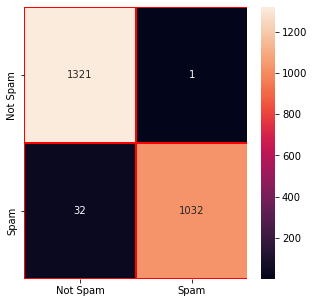

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1322
           1       1.00      0.97      0.98      1064

    accuracy                           0.99      2386
   macro avg       0.99      0.98      0.99      2386
weighted avg       0.99      0.99      0.99      2386



In [164]:
Metrics(LR_pred).cm()

Metrics(LR_pred).report()

Instantiating the Linear SVC model, and testing the fitted model

In [166]:
SVC_model = fit_predict(LinearSVC())

SVC_pred = SVC_model.predict(X_test)

Fitting Model Completed.
Accuracy: 99.53897736797988


Getting the Confusion metric and classification report from the Metrics calss

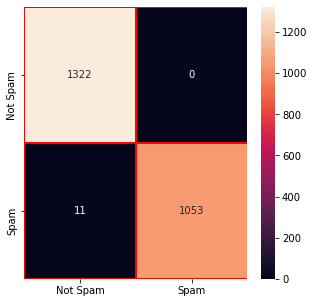

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1322
           1       1.00      0.99      0.99      1064

    accuracy                           1.00      2386
   macro avg       1.00      0.99      1.00      2386
weighted avg       1.00      1.00      1.00      2386



In [165]:
Metrics(SVC_pred).cm()

Metrics(SVC_pred).report()

Instantiating the  Naive Bayes classifier, and testing the fitted model.

In [145]:
NB_model = fit_predict(BernoulliNB())

NB_pred = NB_model.predict(X_test)

Fitting Model Completed.
Accuracy: 92.20452640402347


In [ ]:
Getting the Confusion metric and classification report from the Metrics calss

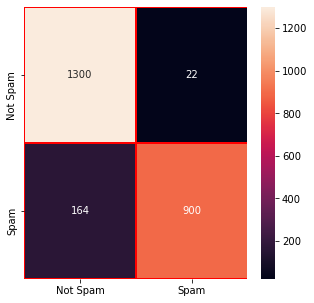

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1322
           1       0.98      0.85      0.91      1064

    accuracy                           0.92      2386
   macro avg       0.93      0.91      0.92      2386
weighted avg       0.93      0.92      0.92      2386



In [148]:


Metrics(NB_pred).cm()

Metrics(NB_pred).report()

<h3>Conclusion</h3>

The Linear SVC out perfroms the other classifiers for this example